In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv("./Churn_Modelling.csv")
df_original = df.copy()
print(df.isnull().sum())
print(df.info())

print(df.dtypes)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-n

In [26]:

if df.index.name != 'RowNumber':
    df = df.set_index('RowNumber')

if set(df['Gender'].unique()) <= {'Female', 'Male'}:
    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1}).astype(bool)

if not any(col.startswith('Geography_') for col in df.columns):
    df = pd.get_dummies(df, columns=['Geography'], drop_first=False)

df[['Exited', 'IsActiveMember', 'HasCrCard']] = df[['Exited', 'IsActiveMember', 'HasCrCard']].astype(bool)


cols_to_drop = [col for col in ['Surname', 'CustomerId'] if col in df.columns]
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)



# df['HasBalance'] = (df['Balance'] > 0).astype(bool)
# df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
# df['Age_Tenure_Ratio'] = df['Age'] / df['Tenure'].replace(0, np.nan)  # évite division par zéro
# df['IsSenior'] = (df['Age'] > 50).astype(bool)


In [27]:
print(df.columns)

print(df.dtypes)

df.head(10)

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')
CreditScore            int64
Gender                  bool
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard               bool
IsActiveMember          bool
EstimatedSalary      float64
Exited                  bool
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,
1,619,False,42,2,0.00,1,True,True,101348.88,True,True,False,False
2,608,False,41,1,83807.86,1,False,True,112542.58,False,False,False,True
3,502,False,42,8,159660.80,3,True,False,113931.57,True,True,False,False
4,699,False,39,1,0.00,2,False,False,93826.63,False,True,False,False
5,850,False,43,2,125510.82,1,True,True,79084.10,False,False,False,True
6,645,True,44,8,113755.78,2,True,False,149756.71,True,False,False,True
7,822,True,50,7,0.00,2,True,True,10062.80,False,True,False,False
8,376,False,29,4,115046.74,4,True,False,119346.88,True,False,True,False
9,501,True,44,4,142051.07,2,False,True,74940.50,False,True,False,False


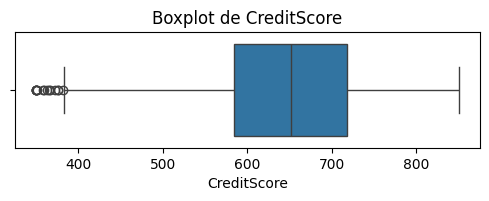

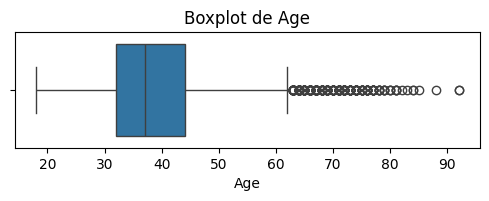

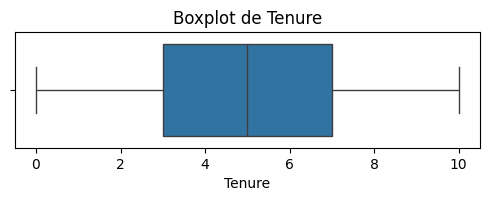

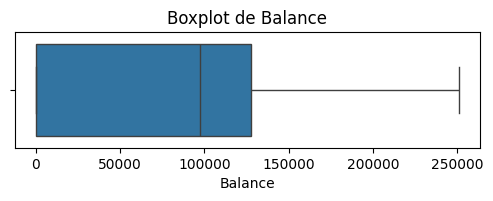

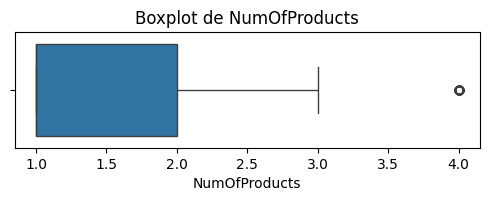

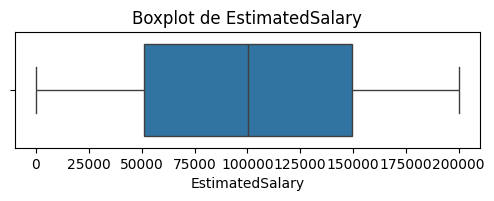

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

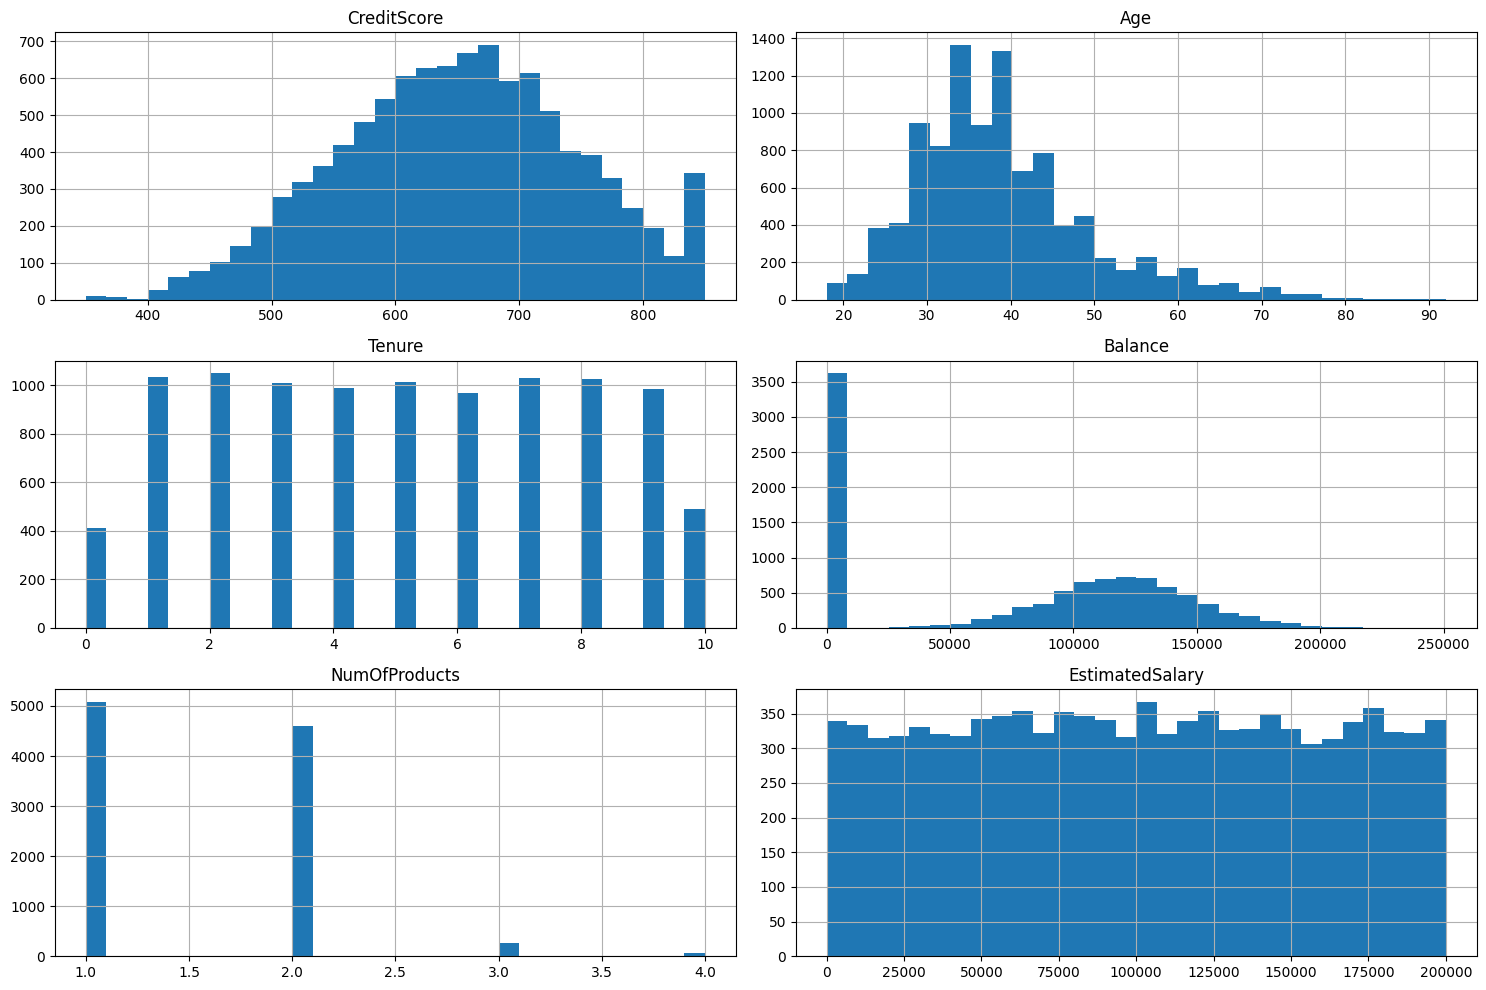

In [29]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


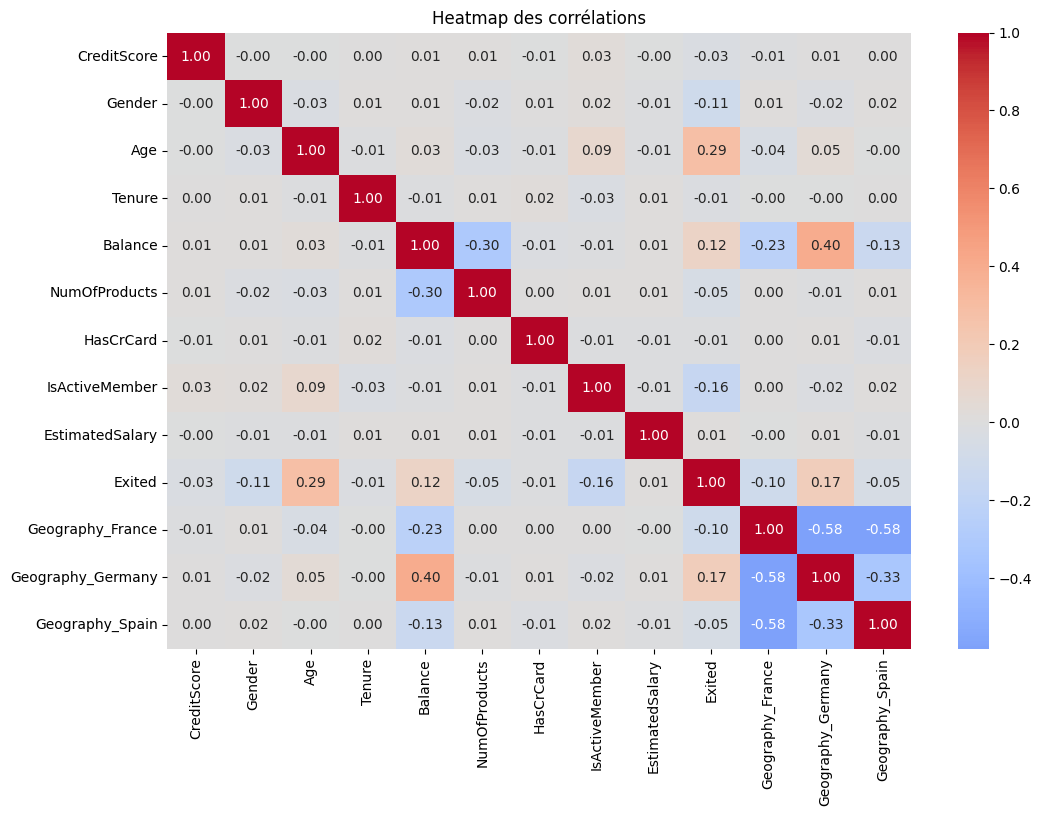

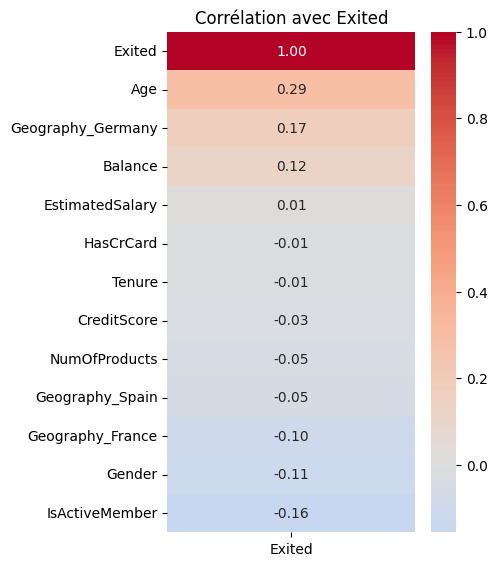

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des corrélations avec Exited
corr = df.corr(numeric_only=True)
corr_exited = corr['Exited'].sort_values(ascending=False)
print(corr_exited)

# Heatmap de toutes les corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Heatmap des corrélations")
plt.show()

# Si tu veux juste la heatmap des corrélations avec Exited
plt.figure(figsize=(4, len(corr_exited) / 2))
sns.heatmap(corr_exited.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Corrélation avec Exited")
plt.show()

In [31]:
cols_to_drop = [col for col in ['HasCrCard', 'Tenure', 'EstimatedSalary', 'CreditScore', 'NumOfProducts'] if col in df.columns]
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)

In [32]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate
from xgboost import XGBClassifier
import numpy as np
import pandas as pd


X = df.drop(columns=['Exited'])
y = df['Exited']

# Calcul du scale_pos_weight pour gérer le déséquilibre
n_0 = (y == 0).sum()
n_1 = (y == 1).sum()
scale_pos_weight = n_0 / n_1

# 1. Optimisation des hyperparamètres (on inclut scale_pos_weight)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'scale_pos_weight': [scale_pos_weight, 1, 2, 5, 10]  # on teste autour de la valeur calculée
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=cv,
    verbose=0,
    n_jobs=-1,
    random_state=42
)
search.fit(X, y)

print("Best params:", search.best_params_)
print("Best ROC-AUC (search):", search.best_score_)

# 2. Validation croisée k-fold sur les meilleurs paramètres
best_xgb = XGBClassifier(**search.best_params_, eval_metric='logloss', random_state=42)

scoring = {
    'roc_auc': 'roc_auc',
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

results = cross_validate(best_xgb, X, y, cv=cv, scoring=scoring, return_estimator=True)

# 3. Affichage des métriques pour chaque fold
print("\nMétriques par fold :")
for i in range(cv.get_n_splits()):
    print(f"Fold {i+1}:")
    for metric in scoring:
        print(f"  {metric.upper()}: {results[f'test_{metric}'][i]:.4f}")
    print()

# 4. Moyenne et écart-type sur l'ensemble des folds
print("Moyenne et écart-type sur l'ensemble des folds :")
for metric in scoring:
    scores = results[f'test_{metric}']
    print(f"{metric.upper()}: {scores.mean():.4f} ± {scores.std():.4f}")

Best params: {'subsample': 0.8, 'scale_pos_weight': 2, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best ROC-AUC (search): 0.8076620136579313

Métriques par fold :
Fold 1:
  ROC_AUC: 0.8212
  ACCURACY: 0.8230
  F1: 0.5597
  PRECISION: 0.5682
  RECALL: 0.5515

Fold 2:
  ROC_AUC: 0.7933
  ACCURACY: 0.8245
  F1: 0.5250
  PRECISION: 0.5861
  RECALL: 0.4755

Fold 3:
  ROC_AUC: 0.7917
  ACCURACY: 0.8135
  F1: 0.5284
  PRECISION: 0.5443
  RECALL: 0.5135

Fold 4:
  ROC_AUC: 0.8148
  ACCURACY: 0.8190
  F1: 0.5371
  PRECISION: 0.5600
  RECALL: 0.5160

Fold 5:
  ROC_AUC: 0.8174
  ACCURACY: 0.8295
  F1: 0.5577
  PRECISION: 0.5907
  RECALL: 0.5283

Moyenne et écart-type sur l'ensemble des folds :
ROC_AUC: 0.8077 ± 0.0126
ACCURACY: 0.8219 ± 0.0054
F1: 0.5416 ± 0.0145
PRECISION: 0.5698 ± 0.0170
RECALL: 0.5169 ± 0.0247


In [36]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import numpy as np
import warnings
warnings.filterwarnings('ignore')

X = df.drop(columns=['Exited'])
y = df['Exited']

# 1. Optimisation des hyperparamètres
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [-1, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 63, 127],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm = LGBMClassifier(random_state=42, verbose=-1)  # Removed is_unbalance since we're using SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Create pipeline with SMOTE and model
from imblearn.pipeline import Pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('lgbm', lgbm)
])

search = RandomizedSearchCV(
    pipeline,
    param_distributions={'lgbm__' + key: value for key, value in param_dist.items()},
    n_iter=30,
    scoring='roc_auc',
    cv=cv,
    verbose=0,
    n_jobs=-1,
    random_state=42
)
search.fit(X, y)

print("Best params:", search.best_params_)
print("Best ROC-AUC (search):", search.best_score_)

# 2. Validation croisée k-fold sur les meilleurs paramètres
best_params = {k.replace('lgbm__', ''): v for k, v in search.best_params_.items()}
best_lgbm = LGBMClassifier(**best_params, random_state=42)
best_pipeline = Pipeline([
    ('smote', smote),
    ('lgbm', best_lgbm)
])

scoring = {
    'roc_auc': 'roc_auc',
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

results = cross_validate(best_pipeline, X, y, cv=cv, scoring=scoring, return_estimator=True)

# 3. Affichage des métriques pour chaque fold
print("\nMétriques par fold :")
for i in range(cv.get_n_splits()):
    print(f"Fold {i+1}:")
    for metric in scoring:
        print(f"  {metric.upper()}: {results[f'test_{metric}'][i]:.4f}")
    print()

# 4. Moyenne et écart-type sur l'ensemble des folds
print("Moyenne et écart-type sur l'ensemble des folds :")
for metric in scoring:
    scores = results[f'test_{metric}']
    print(f"{metric.upper()}: {scores.mean():.4f} ± {scores.std():.4f}")

Best params: {'lgbm__subsample': 0.6, 'lgbm__num_leaves': 15, 'lgbm__n_estimators': 300, 'lgbm__max_depth': 15, 'lgbm__learning_rate': 0.01, 'lgbm__colsample_bytree': 0.8}
Best ROC-AUC (search): 0.7932834045654661

Métriques par fold :
Fold 1:
  ROC_AUC: 0.8047
  ACCURACY: 0.7785
  F1: 0.5484
  PRECISION: 0.4695
  RECALL: 0.6593

Fold 2:
  ROC_AUC: 0.7713
  ACCURACY: 0.7800
  F1: 0.5078
  PRECISION: 0.4671
  RECALL: 0.5564

Fold 3:
  ROC_AUC: 0.7853
  ACCURACY: 0.7775
  F1: 0.5261
  PRECISION: 0.4643
  RECALL: 0.6069

Fold 4:
  ROC_AUC: 0.7957
  ACCURACY: 0.7760
  F1: 0.5264
  PRECISION: 0.4620
  RECALL: 0.6118

Fold 5:
  ROC_AUC: 0.8094
  ACCURACY: 0.7970
  F1: 0.5644
  PRECISION: 0.5010
  RECALL: 0.6462

Moyenne et écart-type sur l'ensemble des folds :
ROC_AUC: 0.7933 ± 0.0137
ACCURACY: 0.7818 ± 0.0077
F1: 0.5346 ± 0.0197
PRECISION: 0.4727 ± 0.0143
RECALL: 0.6161 ± 0.0359
